In [103]:
import Constant
import utils
import os.path
import pandas as pd
from matplotlib import ticker
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as dates

#-------- 画图设置
# 处理中文乱码
# import matplotlib.font_manager
# matplotlib.font_manager.list_fonts

# plt.title('搞定')
# plt.show()
plt.ion()
plt.rcParams["font.sans-serif"]=['simhei','Times New Roman']
# 英文字体
plt.rcParams["font.family"]=['Times New Roman']
plt.rcParams["font.size"]=16
plt.rcParams["axes.unicode_minus"]=False

In [104]:
#-------- 地址信息设置
addrSetFilePath = Constant.addressPath
outTxSetFilePath = Constant.addressOuterTxPath
#0.1ETH pennybags.eth
aExp1 = '0x4026b3da349c2952255ca9db4f055ea57f4e037c'
v1 = '0.1ETH'
#0.1ETH sifu.eth
aExp2='0x5dd596c901987a2b28c38a9c1dfbf86fffc15d77'
v2 = '0.1ETH'
#kaijuking779.eth
aExp3 = '0xa1efa0adecb7f5691605899d13285928ae025844'
v3 = '0.1ETH'

# snxwallet.eth
aExp4='0xcde4d4fa46fe2878c6b0530c9b9ac9ab87a38039'
v4 = '10ETH'

#nordstream2.eth
aExp5='0x770c13284eb073f07d7c88fb787c319d533f785a'
v5 = '10ETH'
#yieldboss.eth
aExp6='0x9ee1873ba8383b1d4ac459abd3c9c006eaa8800a'
v6='10ETH'

#satansp
aExp7='0x7d1d951a65ad6e1e9e1390c77273e642a540526f'
v7='100ETH'

#headlesswizard.eth
aExp8='0x17bc9268f8abb454f0c7ae4d76d969a37235480d'
v8='100ETH'

#north.korea
aExp9='0xb88194f9bcc5ec80cf80c163ca2b123917468793'
v9='100ETH'

In [105]:
addr = aExp9
value = v9
token = False

In [106]:

# 获取地址的外部交易
if token:
    tt = pd.DataFrame()
else:
    nt = pd.DataFrame()
    it = pd.DataFrame()

# 将地址的外部交易找出来，
for file_dir in os.listdir(outTxSetFilePath):
    if value in file_dir:
        data = utils.readPklFile(outTxSetFilePath + file_dir)
        data = data.loc[(data['from'] == addr) | (data['to'] == addr)]
        if data.shape[0] == 0:
            continue
        if token:
            if 'Token' in file_dir:
                addData = [tt, data]
                tt = pd.concat(addData)
        else:
            if 'Normal' in file_dir:
                addData = [nt, data]
                nt = pd.concat(addData)
            if 'Internal' in file_dir:
                addData = [it, data]
                it = pd.concat(addData)
# 去除重复交易
if token:
    txdf = tt.drop_duplicates(subset=['hash'])
    
else:
    txdf = nt.drop_duplicates(subset=['hash'])




|                    readPklFile                     |                 248.34720000217203                 |

|                    readPklFile                     |                 213.1221000017831                  |

|                    readPklFile                     |                 96.65870000026189                  |

|                    readPklFile                     |                 966.2551999936113                  |

|                    readPklFile                     |                 886.0707000130787                  |

|                    readPklFile                     |                 966.6254000039771                  |

|                    readPklFile                     |                 1076.3788000040222                 |

|                    readPklFile                     |                 573.2292999891797                  |

|                    readPklFile                     |                 1129.0612000011606                 |

|                 

In [107]:
# 设置时刻
# yStart = cnt.iloc[0].name
# yEnd = cnt.iloc[cnt.shape[0]-1].name

yIndex = np.arange(0, 24, 1)
print(yIndex)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


no insert


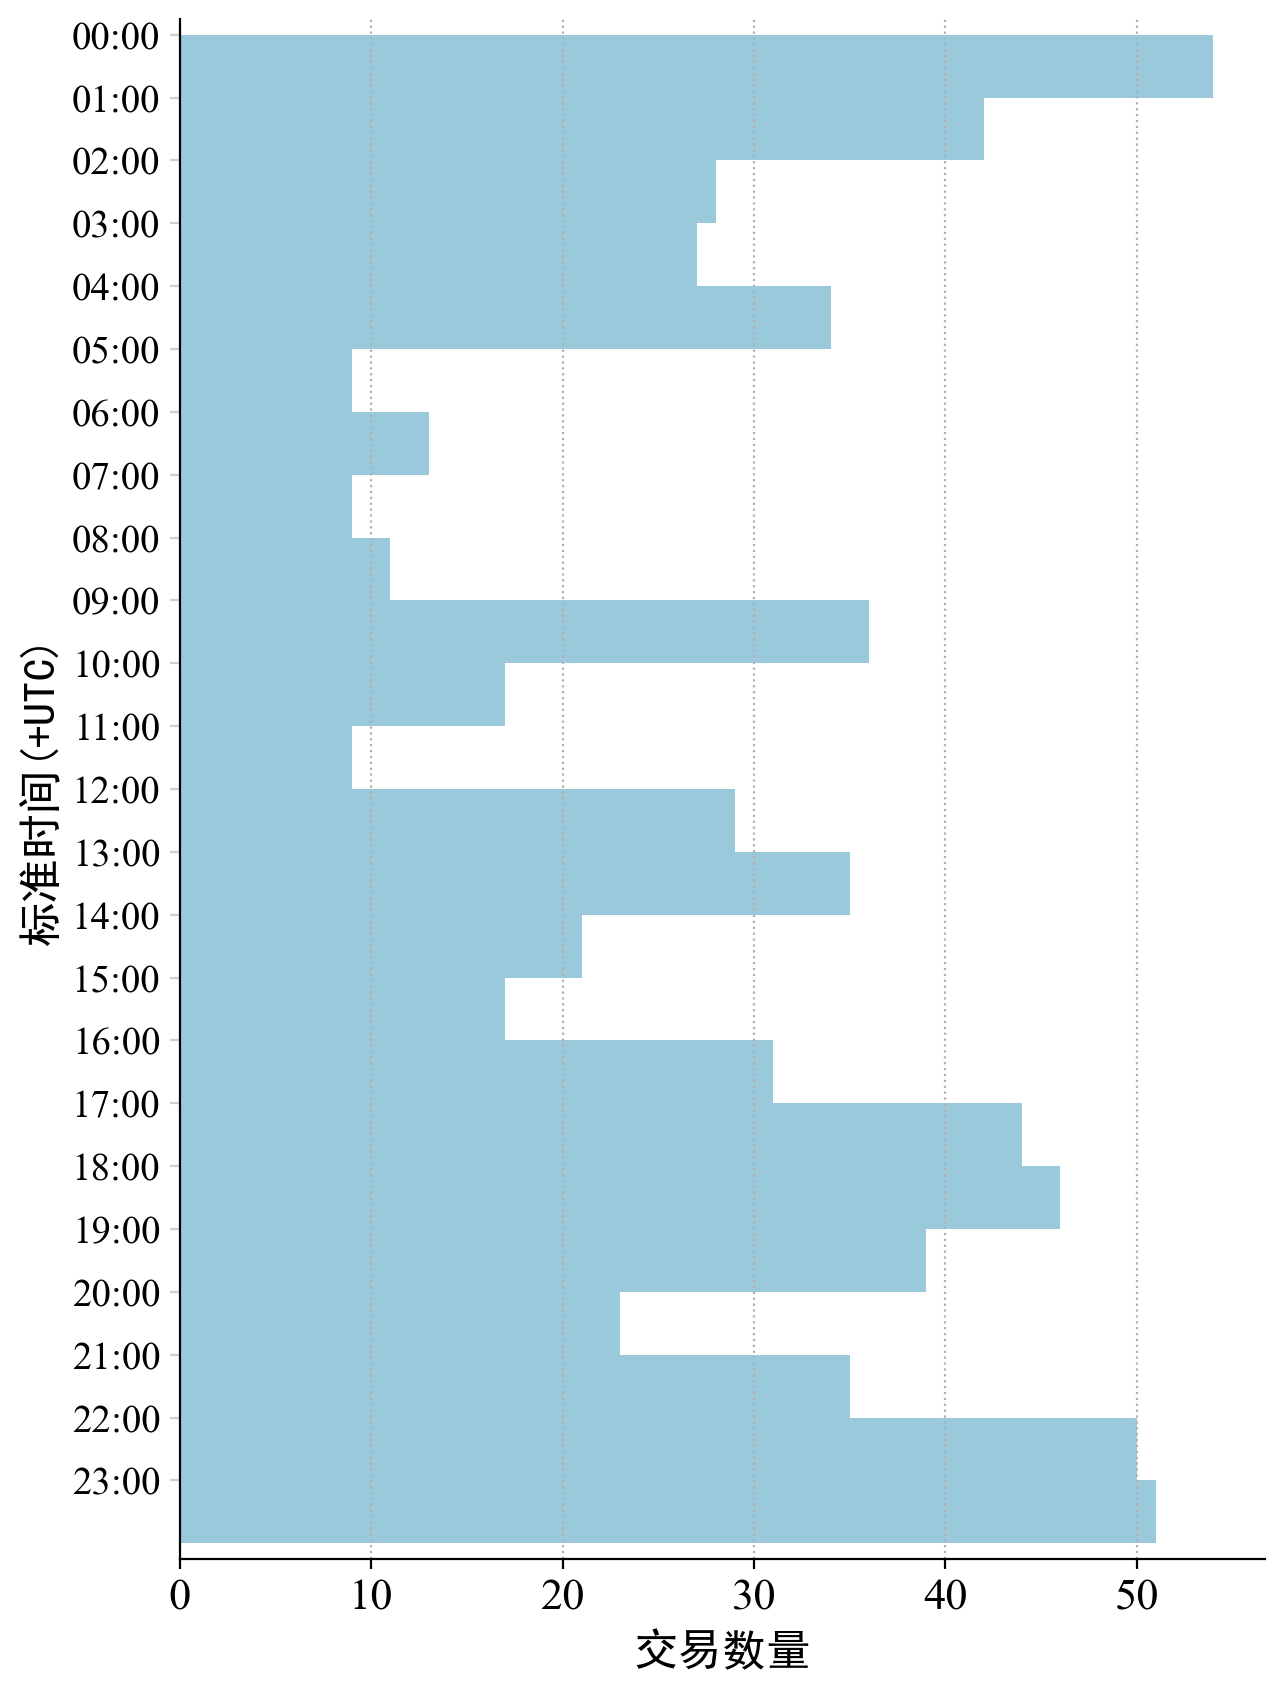

addr: 0xb88194f9bcc5ec80cf80c163ca2b123917468793  OutTx:  710 ( 100ETH )


In [108]:
txdf['datetime'] = pd.to_datetime(txdf['timeStamp'],unit='s',utc=True)
cnt = txdf.groupby(pd.Grouper(key='datetime',freq='H')).size().reset_index(name='count')
time = cnt['datetime'].apply(lambda x: x.strftime('%H'))
time = time.astype(int)
time.name='t'
cnt = pd.concat([cnt,time],axis=1)
cnt = cnt.groupby(by=['t'])['count'].sum().reset_index()
plt.figure(dpi=200,figsize=(7,10))
width = 1
color = '#9ac9db'
align = 'edge'
if(cnt.shape[0] ==yIndex.size):
    print("no insert")
    cnt['t'] = cnt['t'].apply(lambda x: str(x).zfill(2)+':00')
    cnt = cnt.set_index('t')
    cnt['count'].plot.barh(color=color,width=width,align=align)
# cnt['count'].plot(ax=ax, kind='hist',bins = 35,alpha=1,color='#f8ac8c')
else:
    print("insert: ")
    for i, row in cnt.iterrows():
        if(row.name == i):
            continue
        else:
            print(i," ")
            df1 = cnt.iloc[:i,:]
            df2 = cnt.iloc[i:,:]
            add = {i, 0}
            cnt = pd.concat([df1,add,df2])
    cnt['t'] = cnt['t'].apply(lambda x: str(x).zfill(2)+':00')
    cnt = cnt.set_index('t')
    cnt['count'].plot.barh(color=color,width=width,align=align)
# print(cnt)
plt.xlabel('交易数量',fontfamily='sans-serif',)
plt.ylabel('标准时间(+UTC)',fontfamily='sans-serif')
plt.grid(axis='x',linestyle=':')
ax = plt.gca()
# 翻转y轴
ax.invert_yaxis()
ax.tick_params("y",which="major",color='#d0d0d0',labelsize=14)


#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
# ax.set_yticks(np.arange(0,21,2),labels=np.arange(0,21,2))

plt.show()

print("addr:",addr," OutTx: ",txdf.shape[0],"(",value,")")